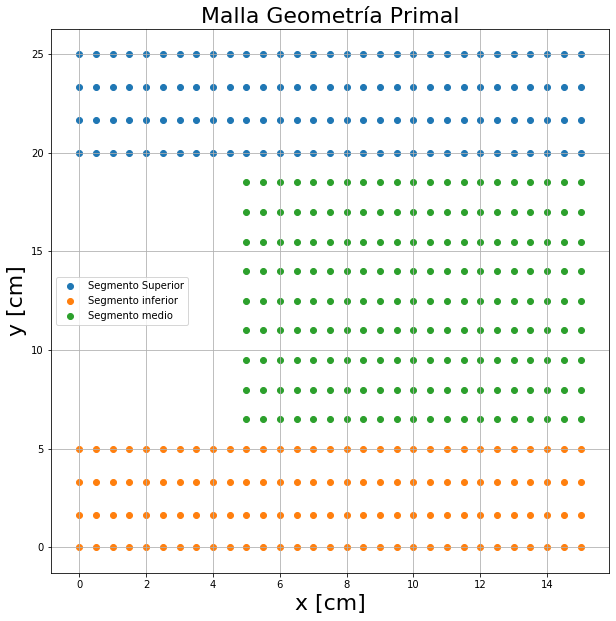

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Nx = 21  # Debe ser un número impar
Ny = 11

dx = (15-5)/(Nx -1)
dy = (20-5)/(Ny -1)



x1 = np.arange(0,15+dx/2,dx)
y1 = np.linspace(0,5,5/dy +1)



x2 = np.linspace(5,15,Nx)
y2 = np.linspace(5,20,Ny)
y2 = y2[1:Ny-1]


x3 = np.arange(0,15+dx/2,dx)
y3 = np.linspace(20,25,(5/dy) +1)

X1, Y1 = np.meshgrid(x1,y1)
X2, Y2 = np.meshgrid(x2,y2)
X3, Y3 = np.meshgrid(x3,y3)


plt.figure(figsize=(10,10))


plt.scatter(X3,Y3,label = 'Segmento Superior')
plt.scatter(X1,Y1,label = 'Segmento inferior')
plt.scatter(X2,Y2,label = 'Segmento medio')
plt.title('Malla Geometría Primal',fontsize =22 )
plt.xlabel('x [cm]',fontsize =22)
plt.ylabel('y [cm]',fontsize =22)
plt.grid()
plt.legend(loc = 0)

437
[[ 0.          1.66666667]
 [ 0.          3.33333333]
 [ 0.         21.66666667]
 [ 0.         23.33333333]
 [ 5.          6.5       ]
 [ 5.          8.        ]
 [ 5.          9.5       ]
 [ 5.         11.        ]
 [ 5.         12.5       ]
 [ 5.         14.        ]
 [ 5.         15.5       ]
 [ 5.         17.        ]
 [ 5.         18.5       ]]


Text(0.5, 1.0, 'Nodos Frontera')

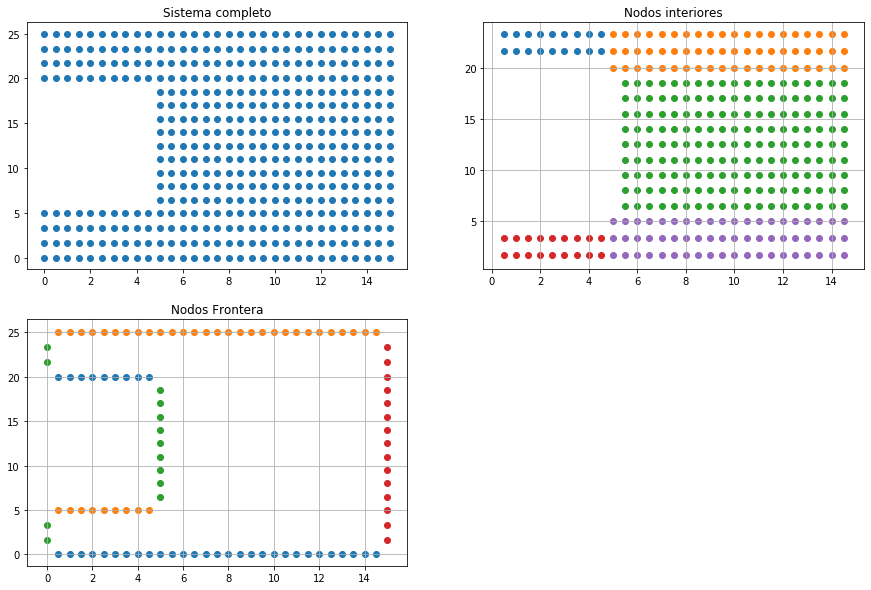

In [73]:
tamano_total = np.shape(X1)[0]*np.shape(X1)[1] + np.shape(X2)[0]*np.shape(X2)[1] + np.shape(X3)[0]*np.shape(X3)[1]
print(tamano_total)
XY = np.zeros((tamano_total,2))
cto = 0
for i in range (0,np.shape(X1)[0]):
    for j in range(0,np.shape(X1)[1]):
        XY[cto][0] = X1[i][j]
        XY[cto][1] = Y1[i][j]
        cto = cto +1
for i in range (0,np.shape(X2)[0]):
    for j in range(0,np.shape(X2)[1]):
        XY[cto][0] = X2[i][j]
        XY[cto][1] = Y2[i][j]
        cto = cto + 1
for i in range (0,np.shape(X3)[0]):
    for j in range(0,np.shape(X3)[1]):
        XY[cto][0] = X3[i][j]
        XY[cto][1] = Y3[i][j]
        cto = cto + 1
        
# iniciamos con la matriz a invertir 
Juno = np.zeros((tamano_total,tamano_total))
Ceres = np.zeros((tamano_total,1))




# Nodos interiores

zona1_e1 = np.where(XY[:,0]>0)
zona1_e11 = np.where(XY[zona1_e1][:,0]<5)
zona1_e111 = np.where(XY[zona1_e1[0][zona1_e11]][:,1]>20)
zona1_e1111 = np.where(XY[zona1_e1[0][zona1_e11][zona1_e111]][:,1]<25)
zona1_e1 = zona1_e1[0][zona1_e11][zona1_e111][zona1_e1111]


zona1_e2 = np.where(XY[:,0]>=5)
zona1_e22 = np.where(XY[zona1_e2][:,0]<15)
zona1_e222 = np.where(XY[zona1_e2[0][zona1_e22]][:,1]>=20)
zona1_e2222 = np.where(XY[zona1_e2[0][zona1_e22][zona1_e222]][:,1]<25)
zona1_e2 = zona1_e2[0][zona1_e22][zona1_e222][zona1_e2222]

zona2_e1 = np.where(XY[:,0]>5)
zona2_e11 = np.where(XY[zona2_e1][:,0]<15)
zona2_e111 = np.where(XY[zona2_e1[0][zona2_e11]][:,1]>5)
zona2_e1111 = np.where(XY[zona2_e1[0][zona2_e11][zona2_e111]][:,1]<20)
zona2_e1 = zona2_e1[0][zona2_e11][zona2_e111][zona2_e1111]

zona3_e1 = np.where(XY[:,0]>0)
zona3_e11 = np.where(XY[zona3_e1][:,0]<5)
zona3_e111 = np.where(XY[zona3_e1[0][zona3_e11]][:,1]>0)
zona3_e1111 = np.where(XY[zona3_e1[0][zona3_e11][zona3_e111]][:,1]<5)
zona3_e1 = zona3_e1[0][zona3_e11][zona3_e111][zona3_e1111]


zona3_e2 = np.where(XY[:,0]>=5)
zona3_e22 = np.where(XY[zona3_e2][:,0]<15)
zona3_e222 = np.where(XY[zona3_e2[0][zona3_e22]][:,1]>0)
zona3_e2222 = np.where(XY[zona3_e2[0][zona3_e22][zona3_e222]][:,1]<=5)
zona3_e2 = zona3_e2[0][zona3_e22][zona3_e222][zona3_e2222]



# Nodos frontera

Frontera_este = np.where(XY[:,0]==15)
Frontera_este2 = np.where(XY[Frontera_este][:,1]>0)
Frontera_este22 = np.where(XY[Frontera_este[0][Frontera_este2]][:,1]<25)
Frontera_este = Frontera_este[0][Frontera_este2][Frontera_este22]

Frontera_oeste = np.where(XY[:,0]==0)
Frontera_oeste2 = np.where(XY[Frontera_oeste][:,1]>0)
Frontera_oeste22 = np.where(XY[Frontera_oeste[0][Frontera_oeste2]][:,1]<25)
Frontera_oeste222 = np.where(XY[Frontera_oeste[0][Frontera_oeste2][Frontera_oeste22]][:,1]<5)
Frontera_oeste2222 = np.where(XY[Frontera_oeste[0][Frontera_oeste2][Frontera_oeste22]][:,1]>20)
Frontera_oeste1 = np.where(XY[:,0] == 5)
Frontera_oeste11 = np.where(XY[Frontera_oeste1][:,1]>5)
Frontera_oeste111 = np.where(XY[Frontera_oeste1[0][Frontera_oeste11]][:,1]<20)
Frontera_oeste = np.concatenate((Frontera_oeste[0][Frontera_oeste2][Frontera_oeste22][Frontera_oeste222],Frontera_oeste[0][Frontera_oeste2][Frontera_oeste22][Frontera_oeste2222],Frontera_oeste1[0][Frontera_oeste11][Frontera_oeste111]),axis = 0)

Frontera_Norte = np.where(XY[:,1]==25)
Frontera_Norte2 = np.where(XY[Frontera_Norte][:,0]>0) 
Frontera_Norte22 = np.where(XY[Frontera_Norte[0][Frontera_Norte2]][:,0]<15) 
Frontera_Norte1 = np.where(XY[:,1] == 5)
Frontera_Norte11 = np.where(XY[Frontera_Norte1][:,0]< 5)
Frontera_Norte111 = np.where(XY[Frontera_Norte1[0][Frontera_Norte11]][:,0]>0)
Frontera_Norte = np.concatenate((Frontera_Norte[0][Frontera_Norte2][Frontera_Norte22],Frontera_Norte1[0][Frontera_Norte11][Frontera_Norte111]),axis = 0)

Frontera_sur = np.where(XY[:,1]==0)
Frontera_sur2 = np.where(XY[Frontera_sur][:,0]>0) 
Frontera_sur22 = np.where(XY[Frontera_sur[0][Frontera_sur2]][:,0]<15) 
Frontera_sur1 = np.where(XY[:,1] == 20)
Frontera_sur11 = np.where(XY[Frontera_sur1][:,0]< 5)
Frontera_sur111 = np.where(XY[Frontera_sur1[0][Frontera_sur11]][:,0]>0)
Frontera_sur = np.concatenate((Frontera_sur[0][Frontera_sur2][Frontera_sur22],Frontera_sur1[0][Frontera_sur11][Frontera_sur111]),axis = 0)

print(XY[Frontera_oeste])

plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.scatter(XY[:,0],XY[:,1])
plt.title('Sistema completo')
plt.subplot(2,2,2)
plt.scatter(XY[zona1_e1][:,0],XY[zona1_e1][:,1])
plt.scatter(XY[zona1_e2][:,0],XY[zona1_e2][:,1])
plt.scatter(XY[zona2_e1][:,0],XY[zona2_e1][:,1])
plt.scatter(XY[zona3_e1][:,0],XY[zona3_e1][:,1])
plt.scatter(XY[zona3_e2][:,0],XY[zona3_e2][:,1])
plt.grid()
plt.title('Nodos interiores')
plt.subplot(2,2,3)
plt.scatter(XY[Frontera_sur][:,0],XY[Frontera_sur][:,1])
plt.scatter(XY[Frontera_Norte][:,0],XY[Frontera_Norte][:,1])
plt.scatter(XY[Frontera_oeste][:,0],XY[Frontera_oeste][:,1])
plt.scatter(XY[Frontera_este][:,0],XY[Frontera_este][:,1])
plt.grid()
plt.title('Nodos Frontera')

In [9]:
print(np.shape(X1),np.shape(Y1))

(4, 31) (4, 31)


In [35]:
print(XY[:,0].any())

True


In [48]:
print(zona3_e2[0][0])

0


In [9]:
a = [0,1,2,3]
b = [4,5,6,7,8,9]
a.append(b)
print(a)

[0, 1, 2, 3, [4, 5, 6, 7, 8, 9]]
